# [01. PyTorch Workflow Fundamentals](https://www.learnpytorch.io/01_pytorch_workflow/)

**[Video link](https://youtu.be/V_xro1bcAuA?si=TvtEpyL-J-vIE3uK&t=15447)**


Through two main algorithms:

Gradient descent - https://youtu.be/IHZwWFHWa-w
Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [67]:
# %pip install -U matplotlib

In [68]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### 1. Data prepring and loading

In [69]:
# *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

##### Splitting data into training and test data

In [70]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [71]:
len(X_train),len(X_test),len(y_test),len(y_train)

(40, 10, 10, 40)

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


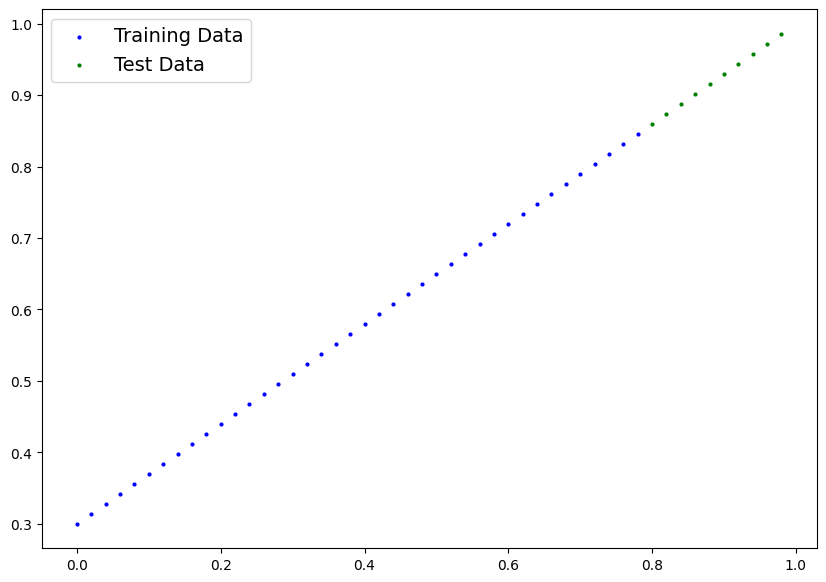

In [72]:
def torch_tensor_to_numpy_array(data):
    return (np.array(torch.tensor(data).cpu().numpy()),)


def plot_prediction(
    train_data=X_train,
    train_label=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):

    plt.figure(figsize=(10, 7))
    plt.scatter(
        torch_tensor_to_numpy_array(train_data),
        torch_tensor_to_numpy_array(train_label),
        c="b",
        s=4,
        label="Training Data",
    )
    plt.scatter(
        torch_tensor_to_numpy_array(test_data),
        torch_tensor_to_numpy_array(test_labels),
        c="g",
        s=4,
        label="Test Data",
    )
    if predictions is not None:
        plt.scatter(
            torch_tensor_to_numpy_array(test_data),
            torch_tensor_to_numpy_array(predictions),
            c="r",
            s=4,
            label="Prediction Data",
        )

    plt.legend(prop={"size": 14})



plot_prediction(X_train, y_train, X_test, y_test)

### 2. Build Model

In [73]:
class LinearRegressionModel(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    


In [74]:
# for i in range(100):
#     torch.manual_seed(i)

#     model_0 = LinearRegressionModel()
#     print(i,list(model_0.parameters())[0][0],list(model_0.parameters())[1][0])
# torch.manual_seed(3)
torch.manual_seed(42)

model_0 = LinearRegressionModel()
print(list(model_0.parameters())[0][0],list(model_0.parameters())[1][0])

tensor(0.3367, grad_fn=<SelectBackward0>) tensor(0.1288, grad_fn=<SelectBackward0>)


In [75]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
weight,bias

(0.7, 0.3)

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


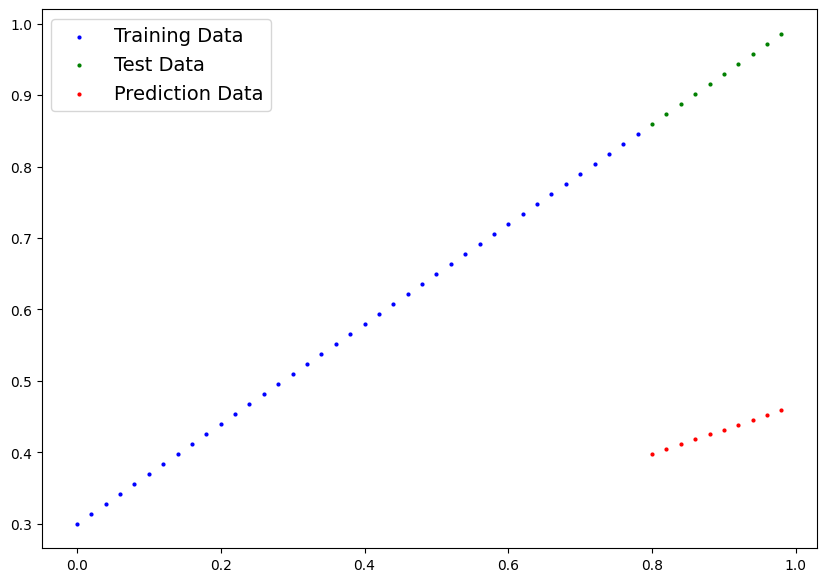

In [77]:
with torch.inference_mode():
    y_preds =model_0(X_test)

plot_prediction(X_train, y_train, X_test, y_test,y_preds)

### Loss Function & Optimizer

In [78]:
# setup loss function
loss_fn = nn.L1Loss()

In [79]:
# setup optimizer function
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Training

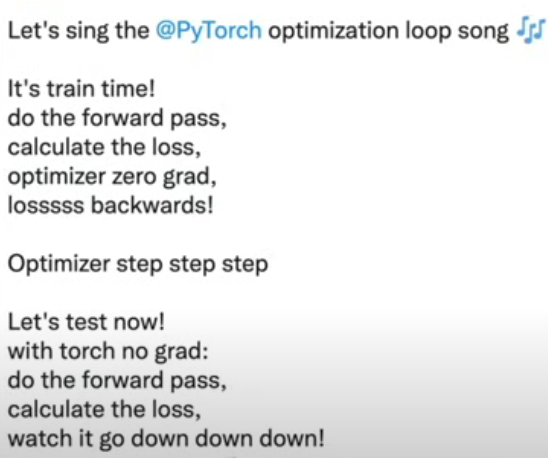

In [80]:
with torch.no_grad():
    print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [81]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [82]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
epochs = 200  # An epoch is one loop through the data
import time

torch.manual_seed(42)

# track improvements
epochs_count = []
loss_values = []
test_loss_values = []

# prev_loss = 0.5
# lr = 1
# 0. LOOP throgh the data
# while prev_loss > 0.0001:
#     # epochs+=1
for epoch in range(epochs):
    # time.sleep(1)
    # set model to training mode
    model_0.train()
    model_0.eval()

    # 1. forward pass
    y_pred = model_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    # if prev_loss < loss:
    #     lr /= 10
    #     optimizer = torch.optim.SGD(params=model_0.parameters(), lr=lr)
    # prev_loss = loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer (perform gradient decent)
    optimizer.step()

    ### Testing
    model_0.eval()

    with torch.inference_mode():
        # 1. do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print("Epoch: ", epoch, " | Loss:", loss, " | Test Loss:", test_loss)
# print("TOTAL EPOCH:",epochs,list(model_0.parameters()))
print(list(model_0.parameters()))

Epoch:  0  | Loss: tensor(0.3129, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.4811)
Epoch:  10  | Loss: tensor(0.1977, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.3464)
Epoch:  20  | Loss: tensor(0.0891, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.2173)
Epoch:  30  | Loss: tensor(0.0531, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.1446)
Epoch:  40  | Loss: tensor(0.0454, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.1136)
Epoch:  50  | Loss: tensor(0.0417, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0992)


Epoch:  60  | Loss: tensor(0.0382, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0889)
Epoch:  70  | Loss: tensor(0.0348, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0806)
Epoch:  80  | Loss: tensor(0.0313, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0723)
Epoch:  90  | Loss: tensor(0.0279, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0647)
Epoch:  100  | Loss: tensor(0.0245, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0565)
Epoch:  110  | Loss: tensor(0.0210, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0482)
Epoch:  120  | Loss: tensor(0.0176, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0406)
Epoch:  130  | Loss: tensor(0.0142, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0323)
Epoch:  140  | Loss: tensor(0.0107, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0241)
Epoch:  150  | Loss: tensor(0.0073, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0165)
Epoch:  160  | Loss: tensor(0.0039, grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0082)
Epoch:  170  |

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


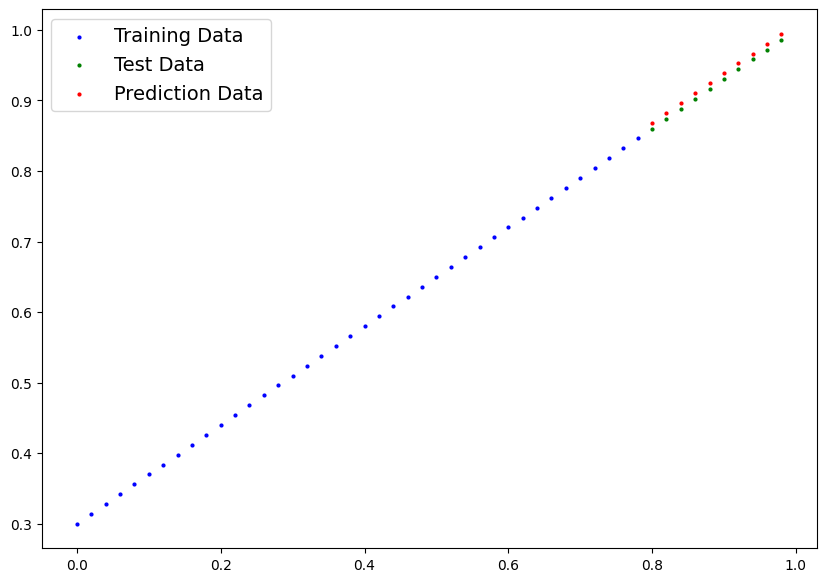

In [84]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

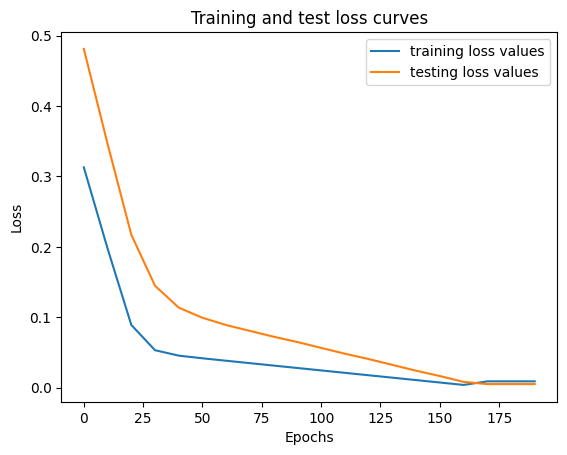

In [85]:
plt.plot(
    epochs_count,
    np.array(torch.tensor(loss_values).cpu().numpy()),
    label="training loss values",
)
plt.plot(epochs_count, test_loss_values, label="testing loss values")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# save/load model

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [86]:
from pathlib import Path

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

In [87]:
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

### Loading a PyTorch Model

- Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [88]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [89]:
model_0_state_dict=torch.load(MODEL_SAVE_PATH)
model_0_state_dict

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [90]:
loaded_model_0.load_state_dict(model_0_state_dict)


<All keys matched successfully>

In [91]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [92]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)

In [93]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting all together 

In [94]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.2+cu118'

In [95]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device: " + device)

Using device: cuda


## 6.1 data

In [96]:
# *known* parameters
weight = 0.9
bias = 0.3

# create
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# X[:10],y[:10],len(X),len(y)

In [97]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(X_test),len(y_test),len(y_train)

(80, 20, 20, 80)

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


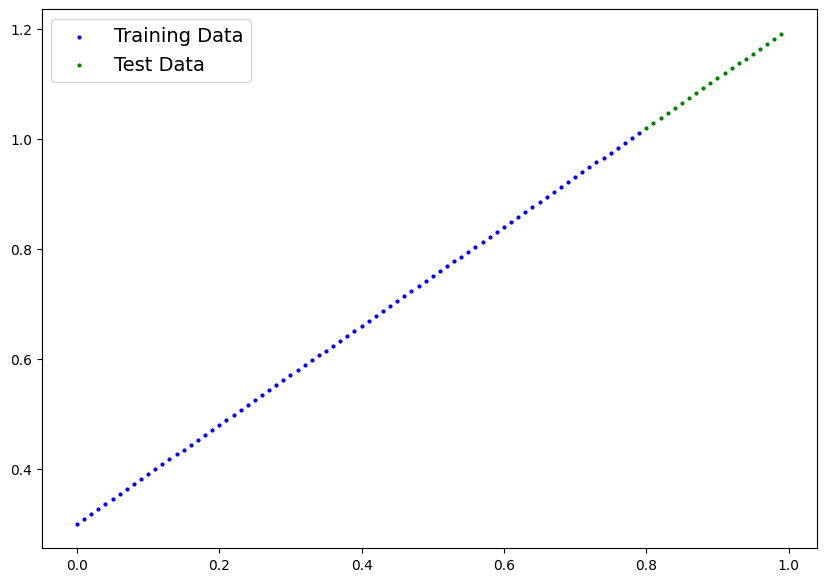

In [98]:
plot_prediction(X_train,y_train,X_test,y_test)

In [99]:
# set data on GPU
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


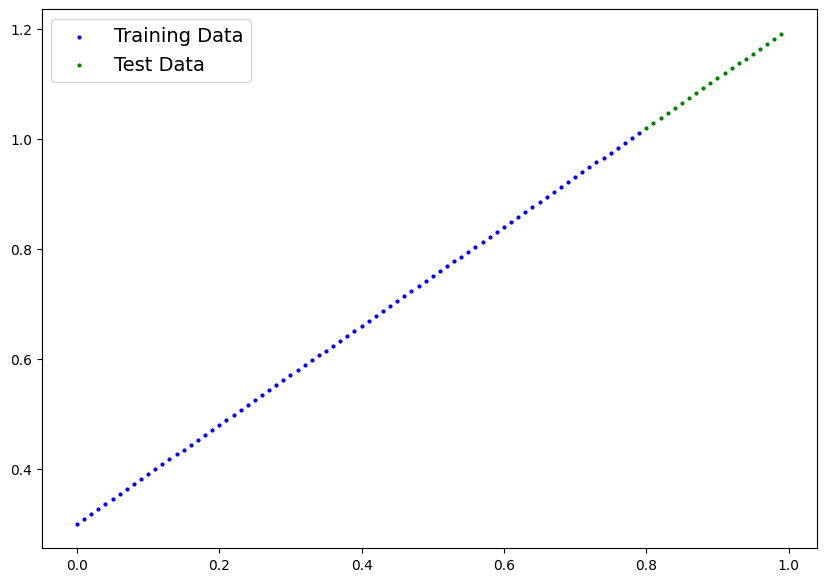

In [100]:
plot_prediction(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear model

In [101]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # use nn.Linear() for creating the model parametrers
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    
    def forward(self,x)-> torch.Tensor:
        return self.linear_layer(x)

In [102]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [103]:
next(model_1.parameters()).device

device(type='cpu')

In [104]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Train model

In [105]:
# setup loss function
loss_fn = nn.L1Loss()
# setup optimizer function
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [112]:
epochs = 200  # An epoch is one loop through the data

torch.manual_seed(42)

# track improvements
epochs_count = []
loss_values = []
test_loss_values = []

# 0. LOOP throgh the data
for epoch in range(epochs):
    # set model to training mode
    model_1.train()

    # 1. forward pass
    y_pred = model_1(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
   
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer (perform gradient decent)
    optimizer.step()

    ### Testing
    model_1.eval()

    with torch.inference_mode():
        # 1. do the forward pass
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print("Epoch: ", epoch, " | Loss:", loss, " | Test Loss:", test_loss)
# print("TOTAL EPOCH:",epochs,list(model_0.parameters()))
print(list(model_1.parameters()))

Epoch:  0  | Loss: tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0076, device='cuda:0')
Epoch:  10  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  20  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  30  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  40  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  50  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  60  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  70  | Loss: tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)  | Test Loss: tensor(0.0107, device='cuda:0')
Epoch:  80  | Los

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_26676\870112383.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (np.array(torch.tensor(data).cpu().numpy()),)


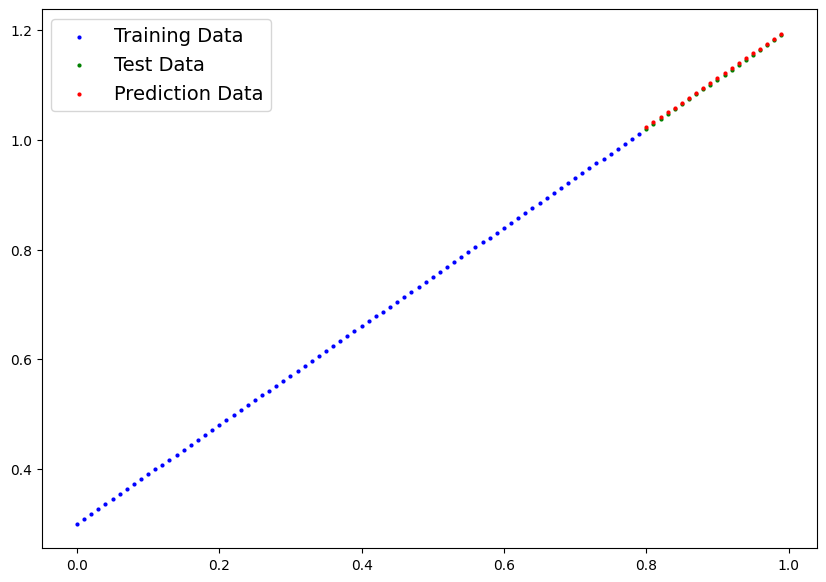

In [113]:
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_prediction(X_train, y_train, X_test, y_test, y_preds)

## 6.4 save and load model

In [114]:
from pathlib import Path

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

In [115]:
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [116]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.to(device)
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [117]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_1(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')